In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [180]:
df = pd.read_csv("car_data.csv")
pd.set_option('display.max_columns', None)
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [182]:
df.drop(['car_ID','symboling'],axis=1,inplace=True)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [183]:
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')

df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')

In [184]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [185]:
def replace_name(x,y):
    df['CarName'].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

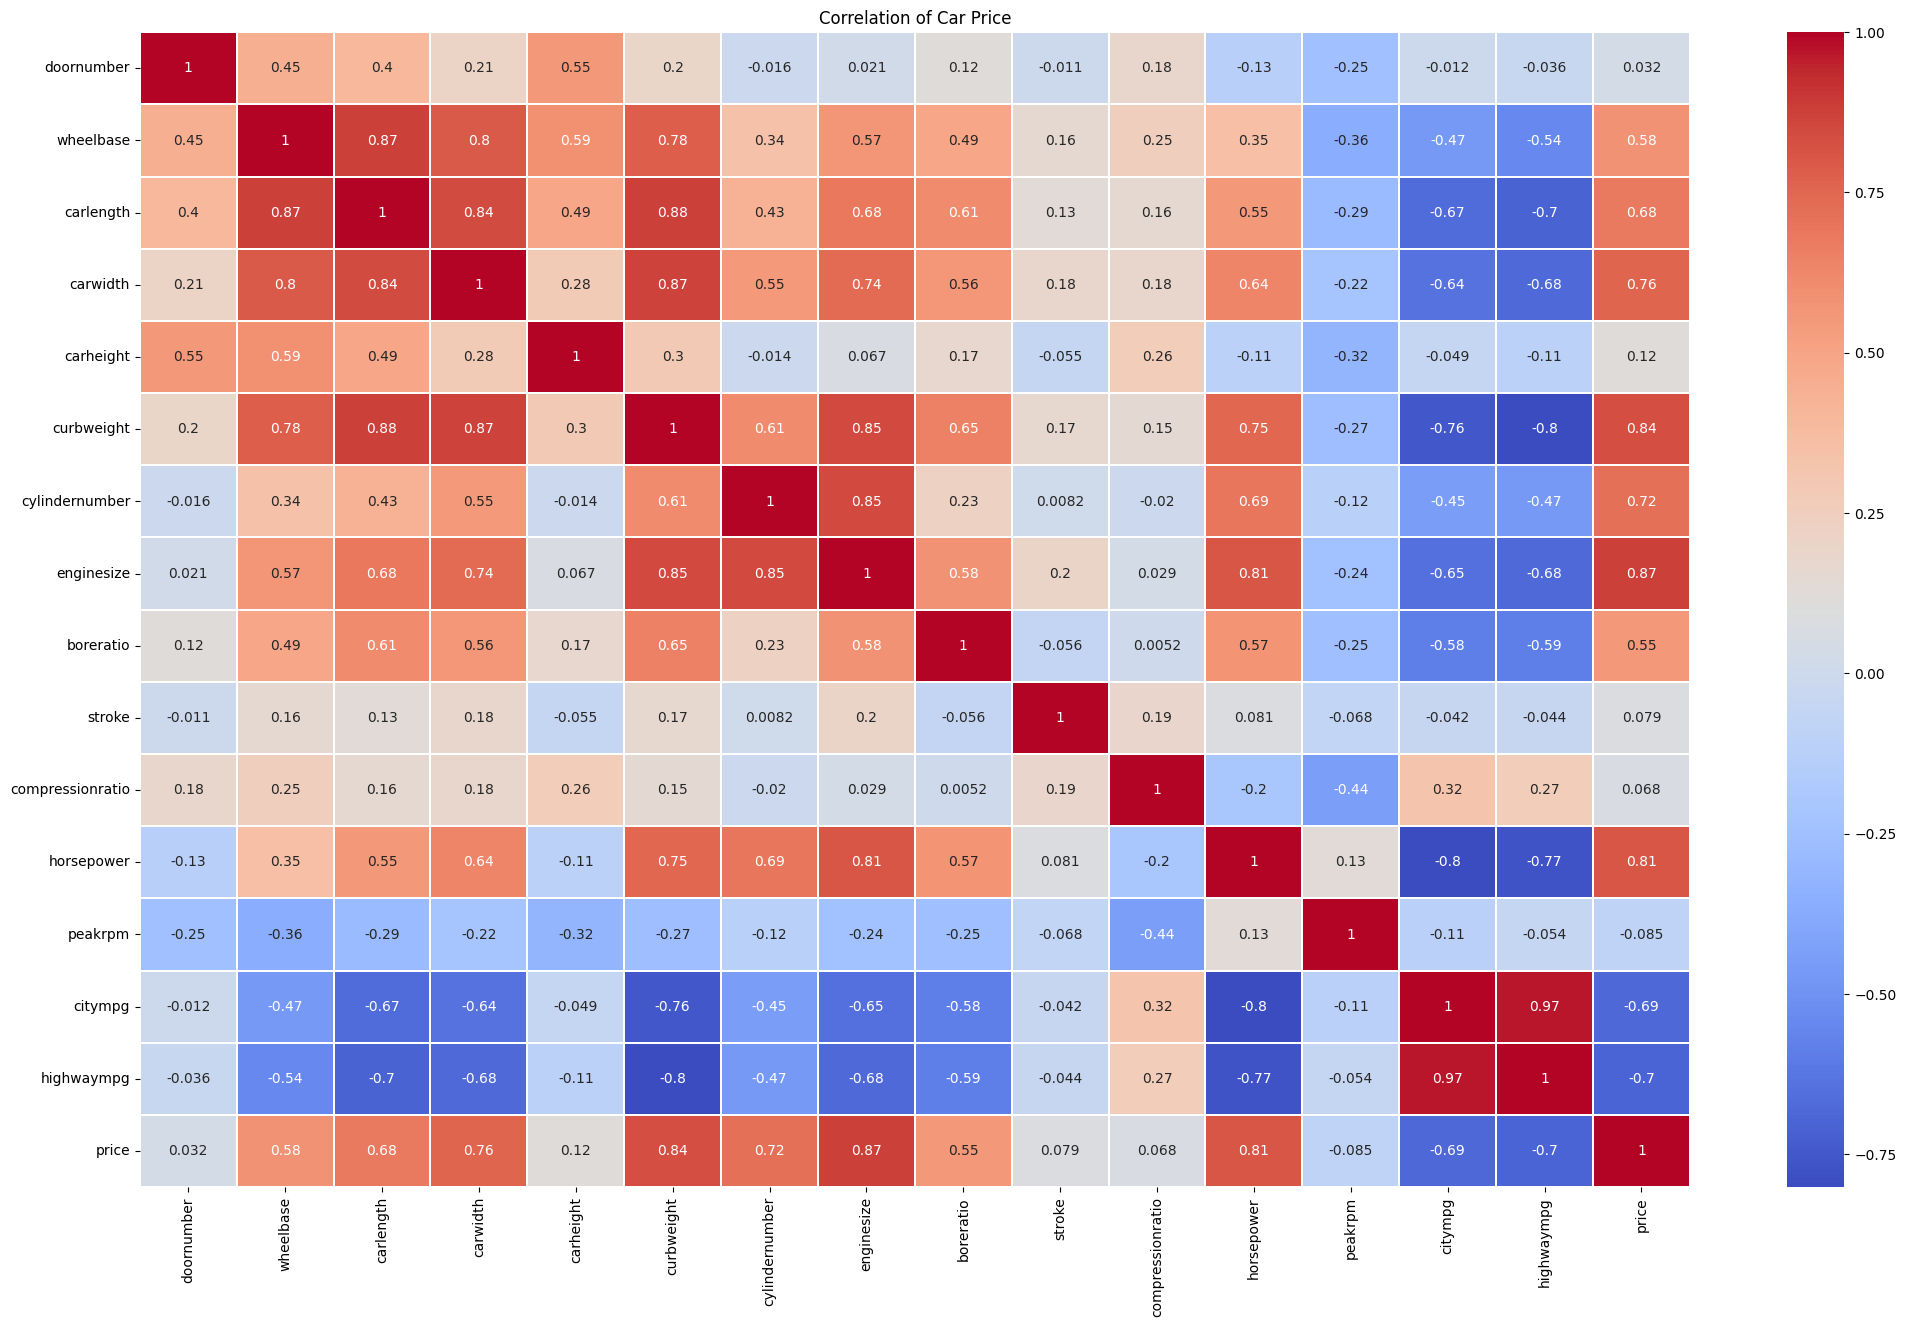

In [186]:
data_corr=df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr,annot=True,cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [187]:
df['price'].describe([0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [188]:


# Cột dữ liệu phân loại
categorical_column = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName'] 

# Cột dữ liệu liên tục
numerical_column = ['wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize', 'boreratio','horsepower','citympg','highwaympg']


# Mã hóa dữ liệu phân loại
df = pd.get_dummies(df, columns=categorical_column, drop_first=True)

X = df.drop('price', axis=1).astype(float).values  # Chuyển đổi thành NumPy array
y = df['price'].values


In [189]:

# Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split  # Lưu ý: Bạn có thể bỏ dòng này nếu không dùng scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Xây dựng mô hình cây quyết định
class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2):
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y):
        num_samples, num_features = X.shape
        # Kiểm tra điều kiện dừng
        if num_samples < self.min_samples_split or len(set(y)) == 1:
            return np.mean(y)  # Trả về giá trị trung bình

        # Tìm thuộc tính và ngưỡng tối ưu
        best_feature, best_threshold = self._best_split(X, y)

        # Nếu không tìm thấy thuộc tính nào tốt, trả về giá trị trung bình
        if best_feature is None:
            return np.mean(y)

        # Tách dữ liệu thành các nhánh
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_tree = self._build_tree(X[left_indices], y[left_indices])
        right_tree = self._build_tree(X[right_indices], y[right_indices])

        return (best_feature, best_threshold, left_tree, right_tree)

    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                mse = self._calculate_mse(y, left_indices, right_indices)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, y, left_indices, right_indices):
        left_mean = np.mean(y[left_indices]) if len(y[left_indices]) > 0 else 0
        right_mean = np.mean(y[right_indices]) if len(y[right_indices]) > 0 else 0
        mse = (np.sum((y[left_indices] - left_mean) ** 2) +
               np.sum((y[right_indices] - right_mean) ** 2)) / len(y)
        return mse

    def predict(self, X):
        return np.array([self._predict(sample, self.tree) for sample in X])

    def _predict(self, sample, tree):
        if not isinstance(tree, tuple):
            return tree  # Giá trị dự đoán (trung bình)

        feature, threshold, left_tree, right_tree = tree
        if sample[feature] < threshold:
            return self._predict(sample, left_tree)
        else:
            return self._predict(sample, right_tree)

# Tạo mô hình cây quyết định
model = DecisionTreeRegressor(min_samples_split=5)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán giá trên tập dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = np.mean(np.abs(y_test - y_pred))


mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f'MAE: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# In giá trị dự đoán
pred_df = pd.DataFrame({'Giá trị thực tế': y_test, 'Giá trị dự đoán': y_pred, 'Sai lệch': y_test - y_pred})

print(pred_df)


MAE: 1865.3130162601628
Mean Squared Error: 7540271.448135506
R-squared: 0.904485844980839
    Giá trị thực tế  Giá trị dự đoán     Sai lệch
0         30760.000     36636.000000 -5876.000000
1         17859.167     16278.000000  1581.167000
2          9549.000      8909.000000   640.000000
3         11850.000     11932.000000   -82.000000
4         28248.000     34285.333333 -6037.333333
5          7799.000      5156.500000  2642.500000
6          7788.000      7412.000000   376.000000
7          9258.000      8349.333333   908.666667
8         10198.000      8909.000000  1289.000000
9          7775.000      7412.000000   363.000000
10        13295.000     11932.000000  1363.000000
11         8238.000      8058.000000   180.000000
12        18280.000     15447.500000  2832.500000
13         9988.000     11246.500000 -1258.500000
14        40960.000     45400.000000 -4440.000000
15         6488.000      6356.250000   131.750000
16         5151.000      5514.333333  -363.333333
17       

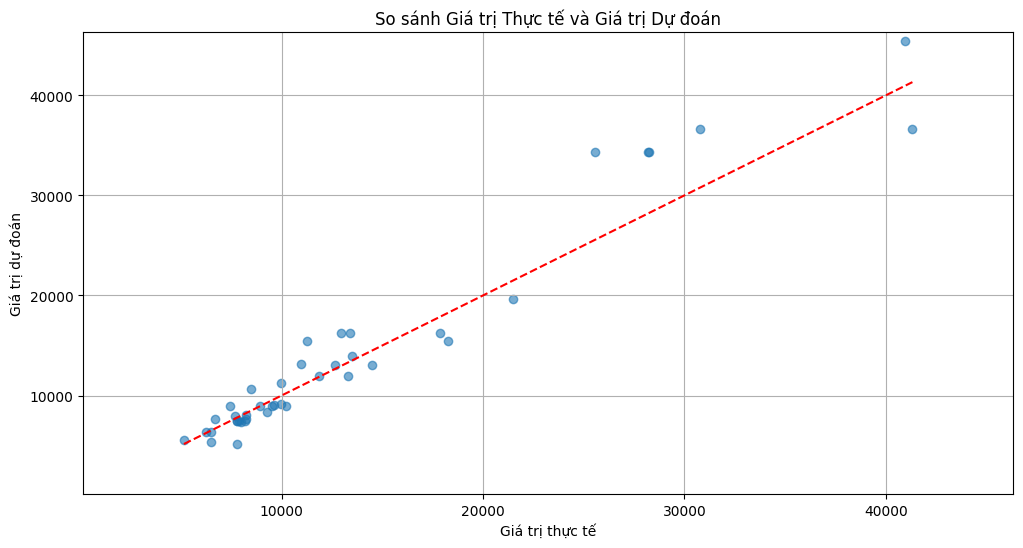

In [190]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường chuẩn
plt.title('So sánh Giá trị Thực tế và Giá trị Dự đoán')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid()
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục x
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục y
plt.show()